In [149]:
import numpy as np
import matplotlib.pyplot as plt

n_obs = 100
sigma_obs = 0.1
sigma_tentai = 0.1
sigma_sum = (sigma_obs**2 + sigma_tentai**2)**0.5
lcs = np.random.randn(n_obs)* sigma_sum
plt.plot(lcs)
plt.show()
print("Observed sigma = %f" % np.std(lcs))
print("Input sigma = %f" % sigma_tentai )
print("Observational error = %f" % sigma_obs)

In [157]:
## p( sigma_tentai | lcs, sigma_obs)
## p( sigma_tentai | lcs, sigma_obs) ∝ p( lcs | sigma_tentai, sigma_obs) * p(sigma_tentai)

## gaussian likelihood 
def p_lcs_given_sigma_tentai(lcs, sigma_obs, sigma_tentai):
    m = 0
    sigma_now = np.sqrt(sigma_obs**2 + sigma_tentai**2)
    test = np.prod( (1/(np.sqrt(2 * np.pi) * sigma_now)) * np.exp( - ((lcs-m)**2)/(2 * sigma_now**2)))
    return test

## uniform distribution from min to max
def p_sigma_tentai(sigma_tentai, sigma_min =0 , sigma_max = 1):
    
    takasa = 1.0/(sigma_max- sigma_min)
    
    if sigma_tentai >= sigma_min and sigma_tentai <= sigma_max:
        return takasa
    else:
        return 0

sigma_tentai_arr = np.linspace(0,1,1000)
p_posterior_sigma =[]

for tentai_dmy in sigma_tentai_arr:
    p_likelihood = p_lcs_given_sigma_tentai(lcs, sigma_obs, tentai_dmy)
    p_prior = p_sigma_tentai(tentai_dmy)
    
    p_posteior = p_likelihood * p_prior
    p_posterior_sigma.append(p_posteior)
    
p_posterior_sigma = np.array(p_posterior_sigma)   
    

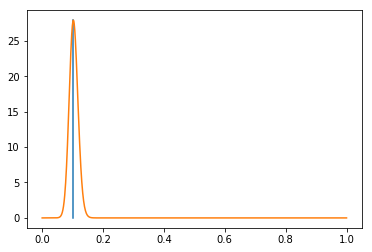

In [163]:
# p(lcs) = \int  p( lcs | sigma_tentai, sigma_obs) * p(sigma_tentai) d(sigma_tentai) = \int p(simga_tentai, lcs | sigma_obs)
p_lcs = np.sum(p_posterior_sigma)/1000
plt.plot([sigma_tentai,sigma_tentai],[0,np.max( p_posterior_sigma/p_lcs)])
plt.plot(sigma_tentai_arr, p_posterior_sigma/p_lcs)